# Generalization Errors

## 1. Introduction

### 1.1 Hoeffding's Inequality for a Single Bin

Suppose we are able to take a sample of size $N$, from an infinite bin, in an attempt to determine the bin frequency, $\mu$, which is unknown.  [**Hoeffding's Inequality**](https://en.wikipedia.org/wiki/Hoeffding%27s_inequality) allows us to calculate a probability bound between a sample frequency, $\nu$, and the unknown bin frequency, $\mu$.  This is given by:

$$\mathbb{P} \left[ \left| \nu - \mu \right| > \epsilon \right] \le 2e^{-2\epsilon^2 N}$$

This is valid for all $N$ and $\epsilon$ and the bound does not depend on $\mu$.  It shows how $\nu$ **generalizes** to $\mu$ for a *single hypothesis*.  It also illustrates the tradeoff between $N, \epsilon$, and the bound.

### 1.2 Hoeffding's Inequality for Multiple Bins

In practice, however, the *multiple hypothesis* case is what we are really interested in.  Hoeffding's Inequality can be generalised to the case of multiple bins (and therefore multiple hypotheses).  Using the approach of the 'union bound', the probability bounds for the multiple bin case can be shown to be:

$$\mathbb{P} \left[ \left| E_{in}(h) - E_{out}(h) \right| > \epsilon \right] \le 2Me^{-2\epsilon^2 N}$$

where $E_{in}(h) = \nu$ and $E_{out}(h) = \mu$, and $M$ is the number of bins.

This result is useful when we have a finite number of bins, but this is not the case when $M \rightarrow \infty$, i.e. we have an infinite number of hypothesis sets, as in cases such as linear regression.  There is a way to deal with this problem by finding a tighter bound on the probability, via the Vapnik Chervonenkis inequality.

### 1.3 The Vapnik-Chervonenkis Inequality

The [Vapnik-Chervonenkis (VC) Inequality](https://en.wikipedia.org/wiki/Vapnik–Chervonenkis_theory#VC_Inequality), addresses the issue of "infinite hypothesis sets" in the multiple bin Hoeffding's Inequality by removing $M$, and introducing a [growth function](http://www.cs.nyu.edu/~mohri/mls/lecture_3.pdf), $m_\mathcal{H}(N)$.  The growth function counts the *most* number of dichotomies on any $N$ points, and can be written as:

$$m_\mathcal{H}(N) = \underset{\mathbf{x_1,\dots,x_N} \in \mathcal{X}}{\max} \left| \mathcal{H}\left(\mathbf{x_1,\dots,x_N}\right)\right|$$

The growth function satisfies:

$$m_\mathcal{H}(N) \le 2^N$$

In practice, however, the inequality, $m_\mathcal{H}(N) \le 2^N$ on the growth function may sometimes be too pessimistic.  A possible situation that we might see could look like the following:

* $m_\mathcal{H}(N) = 2^N, N < k$
* $m_\mathcal{H}(N) < 2^N, N \ge k$

In the first scenario, we say that the $N$ points are fully [shattered](https://en.wikipedia.org/wiki/Shattered_set) by $\mathcal{H}$.  In the second scenario, we say $k$ is a **break point** for $\mathcal{H}$ because no dataset of size $k$ can be 'shattered' by $\mathcal{H}$.

Now if a break point, $k$, exists, it can be shown that the growth function is polynomial (rather than the exponential $m_\mathcal{H}(N) = 2^N$), and satisfies the following inequality:

$$m_\mathcal{H}(N) \le B(N,k) \le \sum\limits_{i=0}^{k-1} \left(\begin{array}{c} N \\ i \end{array}\right)$$

$$m_\mathcal{H}(N) \le B(N,k) \le \sum\limits_{i=0}^{d_{VC}} \left(\begin{array}{c} N \\ i \end{array}\right)$$

which is a polynomial with a maximum power of $N^{d_{VC}}$ where $d_{VC}$ is the [VC dimension](https://en.wikipedia.org/wiki/VC_dimension).

The removal of the quantity, $M$ (which was introduced via the union bound approach), means that the issue where $M \rightarrow \infty$ (infinite hypothesis sets) is no longer relevant.  When the growth function is introduced, we arrive at the **VC inequality** given by (proof of the VC inequality is available [here](https://www.csie.ntu.edu.tw/~htlin/course/ml08fall/doc/vc_proof.pdf)):

$$\mathbb{P}\left[ \left| E_{in}(g) - E_{out}(g) \right| > \epsilon \right] \le 4 m_\mathcal{H}(2N) \exp\left(-\frac{1}{8}\epsilon^2 N\right)$$

**This is the most important theoretical result in machine learning**.

## 2. [Vapnik–Chervonenkis (VC) Theory](https://en.wikipedia.org/wiki/Vapnik–Chervonenkis_theory) by [Vladimir Naumovich Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik) and [Alexey Chervonenkis](https://en.wikipedia.org/wiki/Alexey_Chervonenkis)

### 2.1 Introduction

#### 2.1.1 Definition of the VC Dimension

* The [VC dimension](https://en.wikipedia.org/wiki/VC_dimension), of a hypothesis set, $\mathcal{H}$, is the largest number of points, $N$, that can be fully [shattered](https://en.wikipedia.org/wiki/Shattered_set) by $\mathcal{H}$.
A hypothesis set, $\mathcal{H}$ [of a binary function] is shattered when $m_\mathcal{H}(N) = 2^N$, so this [can be written](http://www.cs.nyu.edu/~mohri/mls/lecture_3.pdf) [mathematically as](http://math.stackexchange.com/questions/640907/vapnik-chervonenkis-theory-growth-function):

$$d_{VC}(\mathcal{H}) = \max\left\{ N: m_\mathcal{H}(N) = 2^N \right\}$$

In other words,

* anything above the VC dimension is a break point

$$k > d_{VC}(\mathcal{H}) \rightarrow k \text{ is a break point for }\mathcal{H}$$

* anything below the VC dimension, you can shatter

$$N \le d_{VC}(\mathcal{H}) \rightarrow \mathcal{H} \text{ can shatter } N \text{ points}$$

#### 2.1.2 Generalisation

If we know that the VC dimension *is finite*, then we can say that we can generalize (i.e. $g \in \mathcal{H}$ will generalize).  This result is:

* independent of the **learning algorithm**
* independent of the **input distribution**
* independent of the **target function**

### 2.2 Probability Bounds from the VC Inequality - how many points are required?

Let us introduce a probability, $\delta$, given by:

$$\delta = 4m_\mathcal{H}(2N)\exp\left(-\frac{1}{8}\epsilon^2 N\right)$$

As we saw earlier, the growth function, $m_\mathcal{H}(N)$, is a polynomial with a maximum power of $N^{d_{VC}}$.  To better understand how the probability bounds behave, it helps to make the following approximation $m_\mathcal{H}(N) \approx N^{d_{VC}}$.  We thus have:

$$\delta \approx 4 (2N)^{d_{VC}}\exp\left(-\frac{1}{8}\epsilon^2 N\right)$$

In the case of large $N$, the term $(2N)^{d_{VC}}$ can become quite large, while on the other hand, the exponential term could become very small.  Hence, for numerics, we choose to calculate $\delta$ via its logarithm, i.e.:

$$\ln \delta \approx \ln 4 + d_{VC} \ln (2N) -\frac{1}{8}\epsilon^2 N$$

This is implemented in the functions below

In [1]:
using PyPlot
using Optim

In [2]:
function get_ln_delta(N, d_VC, epsilon)
    return log(4) + d_VC * log(2N) -(epsilon^2)*N/8
end;

Now lets put some numbers in and see how the probability behaves.  Consider a hypothesis, $\mathcal{H}$, with $d_{VC} = 10$.  Suppose that we need a generalization error that is at most 0.05 (i.e. $\epsilon = 0.05$), and we need to know this with 95% confidence (i.e. $\delta = 0.05$).  In such a case, how many data points, $N$, will we need?

There are two ways to solve this--one way is to try out a few values of $N$ and see which corresponds to the preferred value of $\delta$, i.e.:

In [3]:
d_VC = 10;
epsilon = 0.05;
N_arr = [400000. 420000. 440000. 460000. 480000.];
for N in N_arr
    delta = exp(get_ln_delta(N, d_VC, epsilon));
    println("N = $N, delta = $delta")
end

N = 400000.0, delta = 221896.0765541779
N = 420000.0, delta = 697.7536261452838
N = 440000.0, delta = 2.1448427199601694
N = 460000.0, delta = 0.00645812566110365
N = 480000.0, delta = 1.9080951877323132e-5


A more general approach, however, would be to solve for $N$.  First, an 'error function' needs to be defined (we choose the squared error), and the `optimize` function in Julia will optimize $N$ to the value that minimizes the 'error function' that we just specified, i.e.

In [4]:
function get_error(N, d_VC, epsilon, target_delta)
    delta = exp(get_ln_delta(N, d_VC, epsilon));
    return (delta - target_delta)^2;
end;

result = optimize(N -> get_error(N, 10, 0.05, 0.05), 400000, 500000)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [400000.000000, 500000.000000]
 * Minimizer: 4.529569e+05
 * Minimum: 6.164952e-17
 * Iterations: 16
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 17

In [5]:
N = result.minimum;
err = result.f_minimum;
if result.converged == true
    println("Solution:  N = $N  (error = $err)")
end

Solution:  N = 452956.8652638088  (error = 6.164951888794791e-17)


### 2.3 Generalization Bounds & Tracking Errors

#### 2.3.1 Calculating the Tracking Error by Inverting the Probability Bounds

The probability, $\delta$ can be inverted to find the "level of tracking" (or tolerance), $\epsilon$:

$$\delta = 4 m_\mathcal{H}(2N) \exp\left(-\frac{1}{8}\epsilon^2 N\right)$$

$$\ln \frac{\delta}{4 m_\mathcal{H}(2N)} = -\frac{1}{8}\epsilon^2 N$$

$$\epsilon = \underbrace{\sqrt{\frac{8}{N} \ln \frac{4 m_\mathcal{H}(2N)}{\delta}}}_{\Omega}$$

The "good event", which happens with a probability greater or equal to $1-\delta$, is that $E_{in}$ tracks $E_{out}$:

$$\left|E_{out} - E_{in}\right| \le \Omega\left(N, \mathcal{H}, \delta\right)$$

We can also say with the same probability (note that generally, $E_{in}$ will be smaller than $E_{out}$, i.e. the in-sample error tends to be smaller than the out-of-sample error):

$$ E_{out} - E_{in} \le \Omega\left(N, \mathcal{H}, \delta\right)$$

$$ E_{out} \le E_{in} + \Omega$$

Here, $E_{out} - E_{in}$ can be viewed as a generalization error.  The tradeoff here is that with a bigger hypothesis set (i.e. more parameters), $E_{in}$ will decrease, but $\Omega$ (the generalization error) will increase.  There is a way to find the "optimum" tradeoff, which is a technique called "regularization".

#### 2.3.2 Which one is the tightest bound?

We may wish to compare the original VC bounds to other bounds:

* Original VC Bound: $\epsilon \le \sqrt{\frac{8}{N} \ln \frac{4 m_\mathcal{H}(2N)}{\delta}}$
* Rademacher Penalty Bound: $\epsilon \le \sqrt{\frac{2\ln(2Nm_\mathcal{H}(N))}{N}} + \sqrt{\frac{2}{N} \ln \frac{1}{\delta}} + \frac{1}{N}$
* Parrondo and Van den Broek: $\epsilon \le \sqrt{\frac{1}{N}\left(2\epsilon + \ln\frac{6m_\mathcal{H}(2N)}{\delta}\right)}$
* Devroye: $\epsilon \le \sqrt{\frac{1}{2N}\left[4\epsilon\left(1+\epsilon\right) + \ln\frac{4m_\mathcal{H}(N^2)}{\delta}\right]}$

Using the approximation, $m_\mathcal{H}(N) \approx N^{d_{VC}}$, and splitting the logarithmic terms for numerics, we have:

* Original VC Bound: $\epsilon \le \sqrt{\frac{8}{N} \left[ \ln 4 + v_{DC}\ln (2N) - \ln \delta\right] }$
* Rademacher Penalty Bound: $\epsilon \le \sqrt{\frac{2 \left(\ln (2N) + v_{DC}\ln(N) \right)}{N}} + \sqrt{- \frac{2}{N} \ln \delta} + \frac{1}{N}$
* Parrondo and Van den Broek: $\epsilon \le \sqrt{\frac{1}{N}\left(2\epsilon + \ln 6 + v_{DC} \ln(2N) - \ln\delta\right)}$
* Devroye: $\epsilon \le \sqrt{\frac{1}{2N}\left[4\epsilon\left(1+\epsilon\right) + \ln4 + v_{DC} \ln (N^2) - \ln\delta\right]}$

In [6]:
function get_vc_bound(N,d_VC,delta)
    inner = log(4) + d_VC * log(2N) - log(delta);
    return sqrt(8inner/N);
end;

function get_rademacher_penalty(N,d_VC,delta)
    inner = 2(log(2N) + d_VC * log(N))/N
    return sqrt(inner) + sqrt(-2log(delta)/N) + 1/N;
end;

function get_parrondo_and_van_den_broek(N,d_VC,delta)
    pvdb_err(epsilon,N,d_VC,delta) = (epsilon - sqrt((2epsilon + log(6) + d_VC*log(2N) - log(delta))/N))^2;
    result = optimize(epsilon -> pvdb_err(epsilon,N,d_VC,delta), 0.0, 10.0);
    if result.converged==true
        return result.minimum
    else
        return NaN
    end;
end;

function get_devroye(N,d_VC,delta)
    devroye_err(epsilon,N,d_VC,delta) = (epsilon - sqrt((4epsilon*(1+epsilon) + log(4) + d_VC*log(N^2) - log(delta))/(2N)))^2;
    result = optimize(epsilon -> devroye_err(epsilon,N,d_VC,delta), 0.0, 20.0);
    if result.converged==true
        return result.minimum
    else
        return NaN
    end;
end;

In [7]:
d_VC = 50;
delta = 0.05;

In [8]:
#N_arr = logspace(0,4,11);  #from 1 to 10k
N_arr = [5, 10, 50, 100, 500, 1000, 5000, 10000];
epsilon_vc = [ get_vc_bound(N,d_VC,delta) for N in N_arr ];
epsilon_rp = [ get_rademacher_penalty(N,d_VC,delta) for N in N_arr ];
epsilon_pv = [ get_parrondo_and_van_den_broek(N,d_VC,delta) for N in N_arr ];
epsilon_dv = [ get_devroye(N,d_VC,delta) for N in N_arr ];

In [9]:
function plot_epsilons(N_arr,epsilon_arr,label_arr)
    fig = figure(figsize=(7,4))
    ax = fig[:add_subplot](1,1,1)
    for i in 1:size(label_arr)[1]
        #ax[:loglog](N_arr,epsilon_arr[:,i],label=label_arr[i]);
        loglog(N_arr,epsilon_arr[:,i],"x-",label=label_arr[i]);
    end;
    #ax[:legend](loc="best",frameon=false);
    legend(loc="best",frameon=false,fontsize=10)
    grid(true);
end;

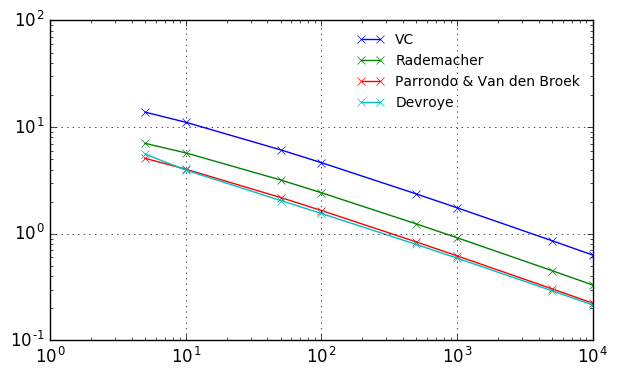

In [10]:
epsilon_arr = [ epsilon_vc epsilon_rp epsilon_pv epsilon_dv ];
label_arr = [ "VC", "Rademacher", "Parrondo & Van den Broek", "Devroye" ];
plot_epsilons(N_arr,epsilon_arr,label_arr);

What we are seeing here is that all of these bounds follow roughly the same kind of trends.  And while it is possible to improve on the VC bound, the maximum improvement here is an improvement by a factor of about 2.5 ~ 3.  For example, we could do a comparison for small $N$ and large $N$ as follows:

Comparison of Bounds for large $N$ = 10,000

In [11]:
println("N = $(N_arr[end])")
println("ϵ (VC)                       = $(epsilon_vc[end])")
println("ϵ (Rademacher)               = $(epsilon_rp[end])")
println("ϵ (Parrondo & Van den Broek) = $(epsilon_pv[end])")
println("ϵ (Devroye)                  = $(epsilon_dv[end])")

N = 10000
ϵ (VC)                       = 0.632174915200836
ϵ (Rademacher)               = 0.3313087859616395
ϵ (Parrondo & Van den Broek) = 0.22369829368155955
ϵ (Devroye)                  = 0.21522804969987752


Comparison of Bounds for small $N$ = 5

In [12]:
println("N = $(N_arr[1])")
println("ϵ (VC)                       = $(epsilon_vc[1])")
println("ϵ (Rademacher)               = $(epsilon_rp[1])")
println("ϵ (Parrondo & Van den Broek) = $(epsilon_pv[1])")
println("ϵ (Devroye)                  = $(epsilon_dv[1])")

N = 5
ϵ (VC)                       = 13.828161484991485
ϵ (Rademacher)               = 7.048776564183685
ϵ (Parrondo & Van den Broek) = 5.101361981980475
ϵ (Devroye)                  = 5.5931255568478475


## 3. Bias and Variance

### 3.1 The Bias-Variance Decomposition

Let's write $E_{out}$ as an *expected value* of the squared error between the hypothesis, $g^{(\mathcal{D})}(\mathbf{x})$ and the target function, $f(\mathbf{x})$, i.e.:

$$E_{out}\left(g^{(\mathcal{D})}\right) = \mathbb{E}_{\mathbf{x}} \left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2\right]$$

where we have introduced the symbol $\mathcal{D}$ to say that this is specific to a particular dataset (if a different dataset is used, we would arrive at a different target function).

Now we wish to get rid of the dependency on the particular dataset, $\mathcal{D}$.  This is done by repeating this over multiple datasets so that we can calculate an 'expected value':

$$\mathbb{E}_\mathcal{D}\left[ E_{out}\left(g^{(\mathcal{D})}\right) \right] = \mathbb{E}_\mathcal{D}\left[ \mathbb{E}_{\mathbf{x}} \left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2\right] \right]$$

$$\mathbb{E}_\mathcal{D}\left[ E_{out}\left(g^{(\mathcal{D})}\right) \right] = \mathbb{E}_{\mathbf{x}} \left[ \mathbb{E}_\mathcal{D}\left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2\right] \right]$$

where in the last step, the order of expectations has been 'reversed'.  We are allowed to do this because we are 'integrating', where the integrand is strictly non-negative.

Let us consider the case where we are learning from multiple datasets.  From each dataset that we 'learn' from, we get a hypothesis.  If we take the 'average' of each of these hypotheses, we will arrive at the concept of an 'average' hypothesis, $\bar g(\mathbf{x})$.  If we have $K$ datasets, $\mathcal{D_1, D_2, \dots D_K}$, then we have:

$$\bar g(\mathbf{x}) = \frac{1}{K} \sum\limits_{k=1}^K g^{(\mathcal{D_k})}\left(\mathbf{x}\right) $$

$$\bar g(\mathbf{x}) = \mathbb{E}_\mathcal{D}\left[ g^{(\mathcal{D})}\left(\mathbf{x}\right) \right] $$

Now we expand the following quantity

$$\mathbb{E}_\mathcal{D}\left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2\right] = \mathbb{E}_\mathcal{D}\left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - \bar g(\mathbf{x}) + \bar g(\mathbf{x}) - f(\mathbf{x})\right)^2\right]$$

$$= \mathbb{E}_\mathcal{D}\left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - \bar g(\mathbf{x})\right)^2 + \left( \bar g(\mathbf{x}) - f(\mathbf{x})\right)^2 + 2\left( g^{(\mathcal{D})}(\mathbf{x}) - \bar g(\mathbf{x})\right) \left( \bar g(\mathbf{x}) - f(\mathbf{x})\right) \right]$$

Let us now look at the 'cross term', $\mathbb{E}_\mathcal{D}\left[ 2\left( g^{(\mathcal{D})}(\mathbf{x}) - \bar g(\mathbf{x})\right) \left( \bar g(\mathbf{x}) - f(\mathbf{x})\right) \right]$, the second factor is a constant, and that the first factor is zero because $\mathbb{E}_\mathcal{D}\left[ g^{(\mathcal{D})}(\mathbf{x}) \right] = \bar g(\mathbf{x})$ we can see that the entire 'cross term' is zero (the reason why the 'squared error' approach was chosen earlier was because with this approach, it could be shown that the cross term would be zero, i.e. it 'decomposes cleanly').  Hence we arrive at the following expression which shows the relationship between:

$$\mathbb{E}_\mathcal{D}\left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2\right] = \underbrace{ \mathbb{E}_\mathcal{D}\left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - \bar g(\mathbf{x})\right)^2 \right] }_{\text{var}(\mathbf{x})} + \underbrace{ \left( \bar g(\mathbf{x}) - f(\mathbf{x})\right)^2 }_{\text{bias}(\mathbf{x})}$$

Hence we have:

$$\mathbb{E}_\mathcal{D}\left[ E_{out}\left(g^{(\mathcal{D})}\right) \right] = \mathbb{E}_{\mathbf{x}} \left[ \mathbb{E}_\mathcal{D}\left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2\right] \right]$$

$$\mathbb{E}_\mathcal{D}\left[ E_{out}\left(g^{(\mathcal{D})}\right) \right] = \mathbb{E}_{\mathbf{x}} \left[ \text{bias}(\mathbf{x}) + \text{var}(\mathbf{x}) \right] = \text{bias + variance}$$

where we have introduced the following 'definitions' for bias and variance:

$$\text{bias} = \mathbb{E}_{\mathbf{x}} \left[ \left( \bar g(\mathbf{x}) - f(\mathbf{x})\right)^2 \right]$$
$$\text{variance} = \mathbb{E}_{\mathbf{x}} \left[  \mathbb{E}_\mathcal{D}\left[ \left( g^{(\mathcal{D})}(\mathbf{x}) - \bar g(\mathbf{x})\right)^2 \right] \right]$$

In the bias variance trade-off, we typically plot the following quantities

* Expected out-of-sample error: $\mathbb{E}_\mathcal{D}\left[ E_{out}\left(g^{(\mathcal{D})}\right) \right]$
* Expected in-sample error: $\mathbb{E}_\mathcal{D}\left[ E_{in}\left(g^{(\mathcal{D})}\right) \right]$

Note: 

* $g^{(\mathcal{D})}(\mathbf{x})$ is your hypothesis
* $\bar g(\mathbf{x})$ is the 'best possible' hypothesis that you would get from an infinite number of datasets (it need not necessarily be **in** the hypothesis set).
* the difference between the two above quantities is how far your particular hypothesis is from the 'best possible'
* $f(\mathbf{x})$ is the target function
* the difference between'the best possible' $\bar g(\mathbf{x})$ and the target function, $f(\mathbf{x})$, is called the bias.

### 3.2 The Bias and Variance by Example

Here, we examine the bias-variance tradeoff using a simple example.

Consider the following target function:

$f: \left[-1,1\right] \rightarrow \mathbb{R}$ given by $f(x) = \sin\left(\pi x\right)$

Assume an input probability distribution uniform on [-1, 1] and that we use only 2 examples for the training set to find the best hypothesis of the following form:

$$h(x) = ax$$

Suppose we choose a least squared error measure:

$$e(\mathbf{x}) = \frac{1}{N} \sum\limits_{i=1}^N \left[ h(x_i) - \sin(\pi x_i) \right]^2$$

$$e(\mathbf{x}) = \frac{1}{N} \sum\limits_{i=1}^N \left[ ax_i - \sin(\pi x_i) \right]^2$$

Setting the derivative to zero

$$\frac{\partial e(\mathbf{x})}{\partial a} = \frac{2}{N} \sum\limits_{i=1}^N x_i \left[ ax_i - \sin(\pi x_i) \right] = 0$$

$$\sum\limits_{i=1}^N \left[ ax_i^2 - x_i \sin(\pi x_i) \right] = 0 \Leftrightarrow
\sum\limits_{i=1}^N ax_i^2 = \sum\limits_{i=1}^N x_i \sin(\pi x_i)$$

$$a = \frac{\sum\limits_{i=1}^N x_i \sin(\pi x_i)}{\sum\limits_{i=1}^N x_i^2} = \frac{\sum\limits_{i=1}^N x_i y_i}{\sum\limits_{i=1}^N x_i^2}$$


In [13]:
function generate_dataset(;n_points=200)
    x = linspace(-1,1,n_points);
    y = sin(π*x);
    x_sample = rand(2);
    y_sample = sin(π*x_sample);
    return x,y,x_sample,y_sample;
end;

function fit_a(x_sample,y_sample)
    sum = x_sample[1]*y_sample[1]+x_sample[2]*y_sample[2]
    return sum/(x_sample[1]^2+x_sample[2]^2);
end;

function predict_y_a(x,a)
    return a .* x;
end;

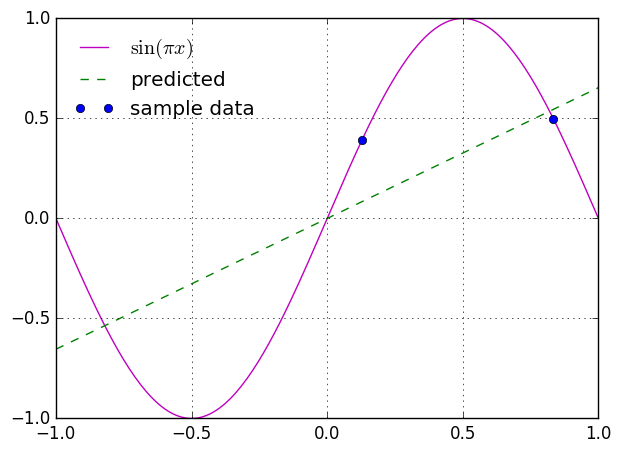

In [14]:
function plot_xy(x,y,x_sample,y_sample,y_pred)
    figure(figsize=(7,5));
    plot(x,y,"m-",label=L"$\sin(\pi x)$");
    plot(x,y_pred,"g--",label="predicted");
    plot(x_sample,y_sample,"bo",label="sample data");
    grid(true);
    legend(loc="best",frameon=false);
end;
x,y,x_sample,y_sample = generate_dataset();
y_pred = predict_y_a(x,fit_a(x_sample,y_sample));
plot_xy(x,y,x_sample,y_sample,y_pred);

We now run 1 million trials to obtain $\bar g(\mathbf{x})$.  This will give us the coefficient, $a$, of the 'best possible' hypothesis, $h(\mathbf{x}) = a\mathbf{x}$

$$\bar g(\mathbf{x}) = \mathbb{E}_\mathcal{D}\left[ g^{(\mathcal{D})}\left(\mathbf{x}\right) \right] = \lim\limits_{K\rightarrow\infty} \frac{1}{K} \sum\limits_{k=1}^K g^{(\mathcal{D_k})}\left(\mathbf{x}\right)$$

In [15]:
function get_avg_a(n_trials; n_points=200)
    a_arr = Float64[];
    for i in 1:n_trials
        x_sample = rand(2);
        y_sample = sin(π*x_sample);
        a = fit_a(x_sample,y_sample);
        push!(a_arr,a);
    end
    return mean(a_arr);
end;
a = get_avg_a(1e6);    #1.423, 1.425, 1.424, 1.427
println("<g(x)> = $(round(a,2))x");

<g(x)> = 1.43x


With the $\bar g(\mathbf{x})$ that we have just obtained, we can now calculate the bias and variance as follows:

$$\text{bias} = \mathbb{E}_{\mathbf{x}} \left[ \left( \bar g(\mathbf{x}) - f(\mathbf{x})\right)^2 \right]$$
$$\text{variance} = \mathbb{E}_{\mathbf{x}} \left[  \mathbb{E}_\mathcal{D}\left[ \left(\bar g(\mathbf{x}) - g^{(\mathcal{D})}(\mathbf{x})\right)^2 \right] \right]$$

In [16]:
function get_bias_variance(avg_a, n_trials; n_points=200)
    bias  = Float64[];
    var   = Float64[];
    for i in 1:n_trials
        x_sample = rand(2);
        y_sample = sin(π*x_sample);
        a = fit_a(x_sample,y_sample);
        g_bar_x = avg_a*x_sample;
        push!(bias,mean((g_bar_x - y_sample).^2));
        push!(var,mean((g_bar_x - a .* x_sample).^2));
    end
    return bias, var;
end;

In [17]:
bias,var = get_bias_variance(a, 1e7);
println("<bias> = $(mean(bias))");
println("<var>  = $(mean(var))");

<bias> = 0.27073224805345697
<var>  = 0.20279688825848907
